# Looking at mask predictions

Running validation data through saved model to look at masks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import sys
import torch
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

sys.path.append('../src')
from UNet2D import UNet2D
from datasets import MycetomaDataset
from metrics import batch_dice_coeff, bce_dice_loss, dice_coefficient
from postprocessing import threshold_mask, post_process_binary_mask

In [3]:
DATA_DIR = '../data'

In [4]:
train_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/training_dataset/**/*.jpg')])
val_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/validation_dataset/**/*.jpg')])

print(f"Train length: {len(train_paths)}")
print(f"Val length: {len(val_paths)}")

Train length: 537
Val length: 87


In [5]:
# Set Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [6]:
train_dataset = MycetomaDataset(train_paths, DATA_DIR)
val_dataset = MycetomaDataset(val_paths, DATA_DIR)

In [7]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

In [8]:
# Plot an image, along with prediction and ground truth
def plot_image(im, pred, gt):

    fig, ax = plt.subplots(1, 3, figsize=(10, 5))

    ax[0].imshow(im)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(pred)
    ax[1].set_title('prediction')
    ax[1].axis('off')

    ax[2].imshow(gt)
    ax[2].set_title('GT')
    ax[2].axis('off')

    plt.show()

In [9]:
# Create and load model save
model = UNet2D(3, 1, 8)
state_dict = torch.load('../model_saves/updated_masks_best_model.pth', map_location=torch.device(device))

# Sometimes, the model dictionary keys contain 'module.' prefix which we don't want
remove_prefix = True

if remove_prefix:
    remove_prefix = 'module.'
    state_dict = {k[len(remove_prefix):] if k.startswith(remove_prefix) else k: v for k, v in state_dict.items()}

model.load_state_dict(state_dict)
model = model.to(device)

model.eval();

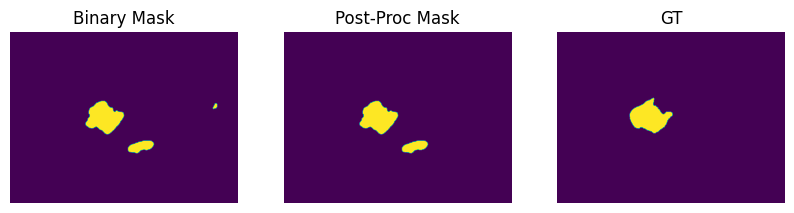

Dice score before postproc: 0.8001209497451782 vs after: 0.807776153087616


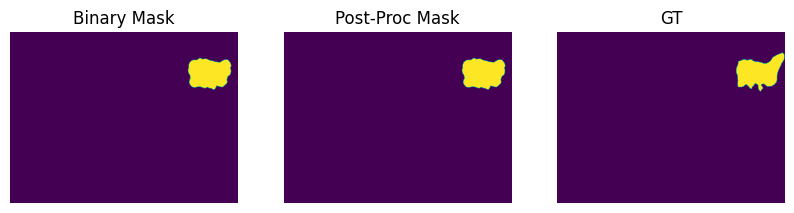

Dice score before postproc: 0.8933004140853882 vs after: 0.8933113813400269


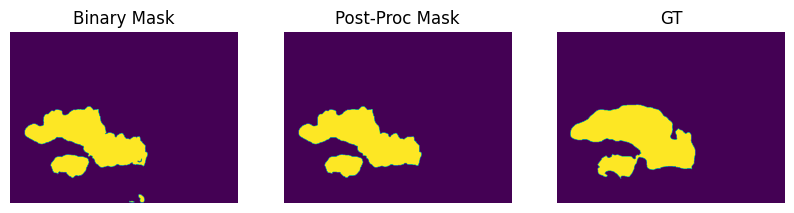

Dice score before postproc: 0.8609266877174377 vs after: 0.8650356531143188


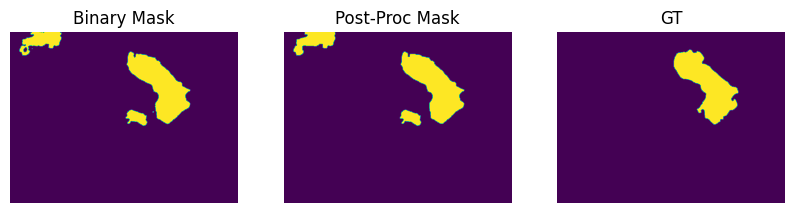

Dice score before postproc: 0.7966079711914062 vs after: 0.7940584421157837


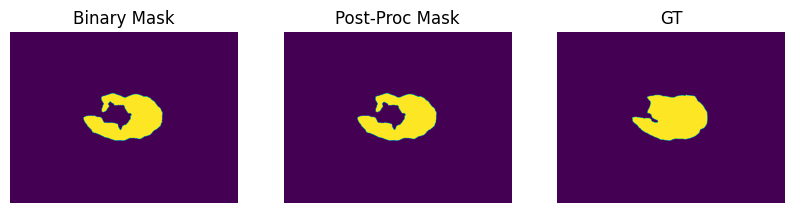

Dice score before postproc: 0.8586342930793762 vs after: 0.8588876724243164


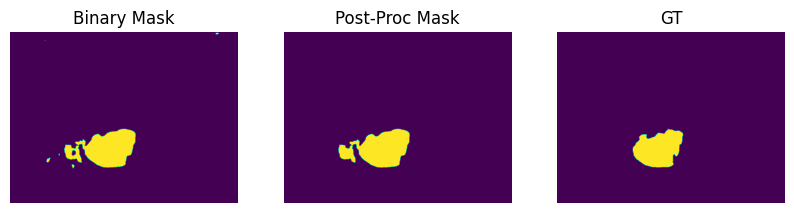

Dice score before postproc: 0.8830407857894897 vs after: 0.8859109878540039


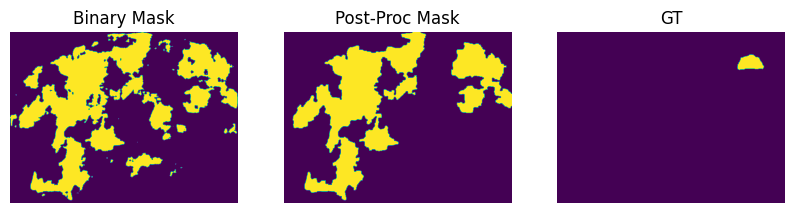

Dice score before postproc: 0.04837307706475258 vs after: 0.05698245018720627


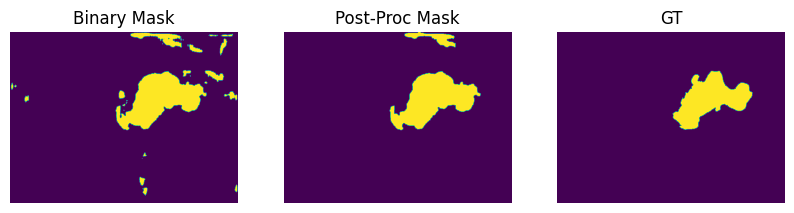

Dice score before postproc: 0.7571116089820862 vs after: 0.8276376724243164


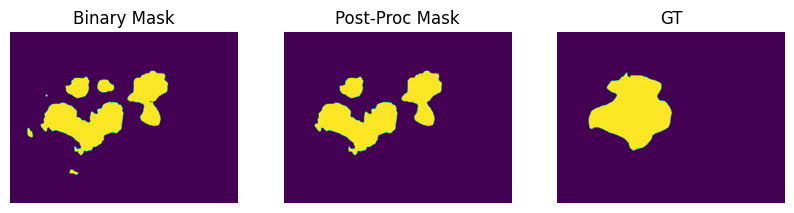

Dice score before postproc: 0.6756887435913086 vs after: 0.6534927487373352


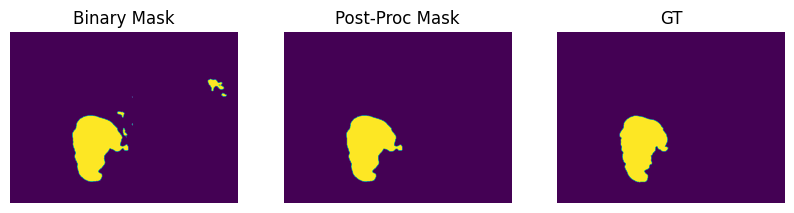

Dice score before postproc: 0.9322687387466431 vs after: 0.9654938578605652


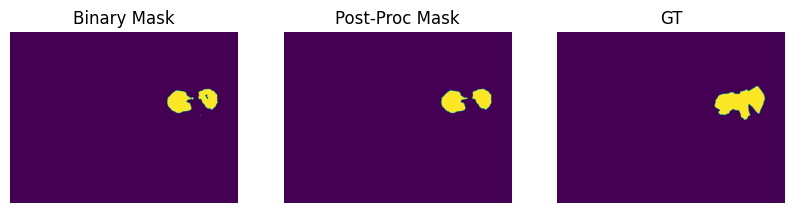

Dice score before postproc: 0.7504412531852722 vs after: 0.7538416385650635


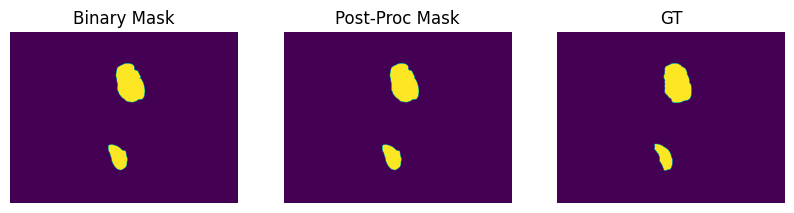

Dice score before postproc: 0.9422387480735779 vs after: 0.9422799944877625


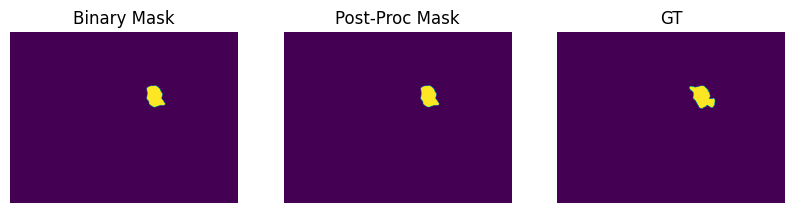

Dice score before postproc: 0.8719527721405029 vs after: 0.8713735342025757


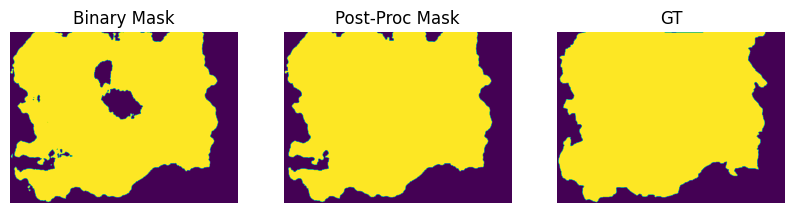

Dice score before postproc: 0.9522086977958679 vs after: 0.97420734167099


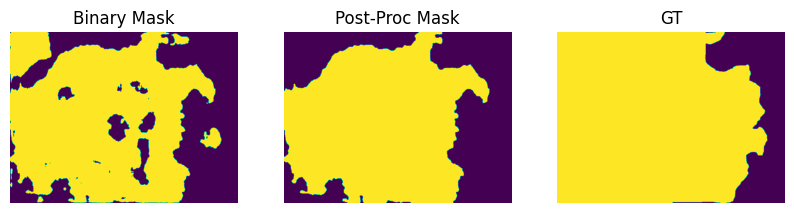

Dice score before postproc: 0.8671549558639526 vs after: 0.8598626852035522


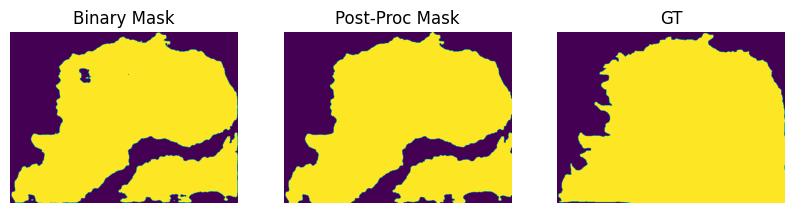

Dice score before postproc: 0.9195219874382019 vs after: 0.9221616387367249


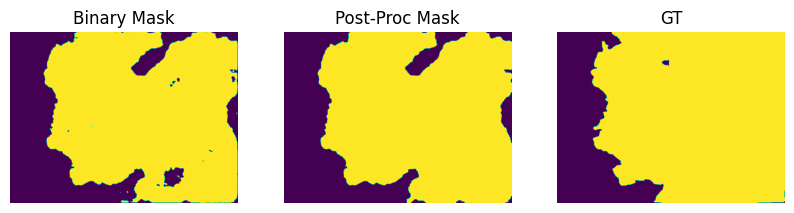

Dice score before postproc: 0.9495458602905273 vs after: 0.9557787775993347


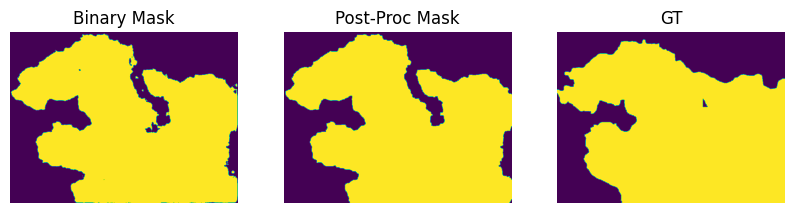

Dice score before postproc: 0.9376919865608215 vs after: 0.9395192265510559


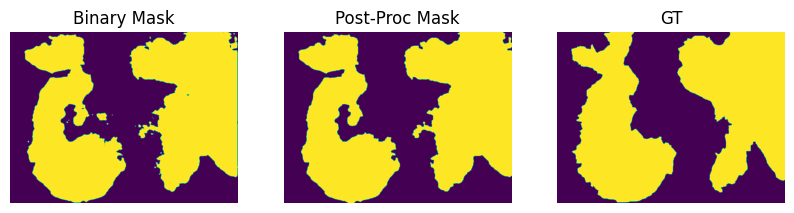

Dice score before postproc: 0.9073129892349243 vs after: 0.9100214838981628


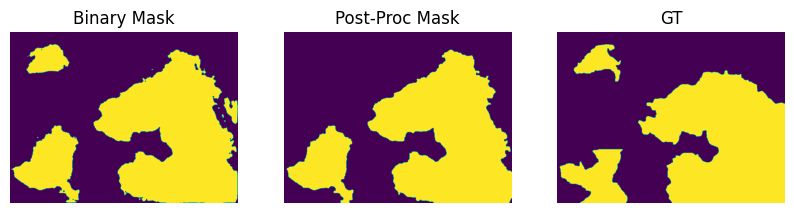

Dice score before postproc: 0.8783778548240662 vs after: 0.8533838391304016


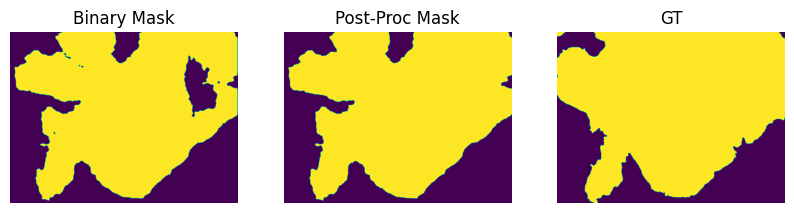

Dice score before postproc: 0.9226267337799072 vs after: 0.9457457661628723


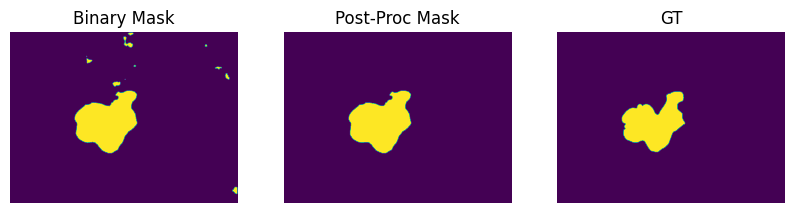

Dice score before postproc: 0.9102824926376343 vs after: 0.938581109046936


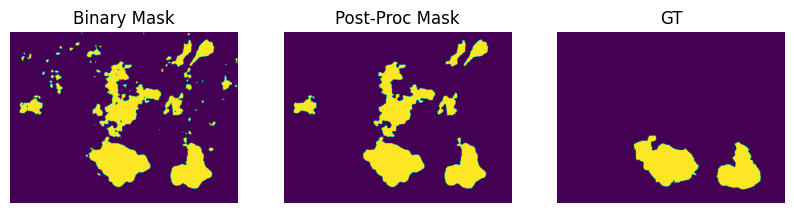

Dice score before postproc: 0.5829678177833557 vs after: 0.6214749217033386


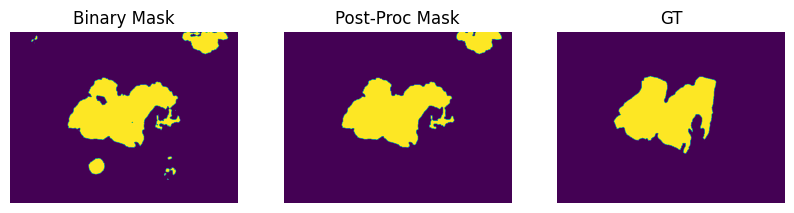

Dice score before postproc: 0.8140270113945007 vs after: 0.8402174711227417


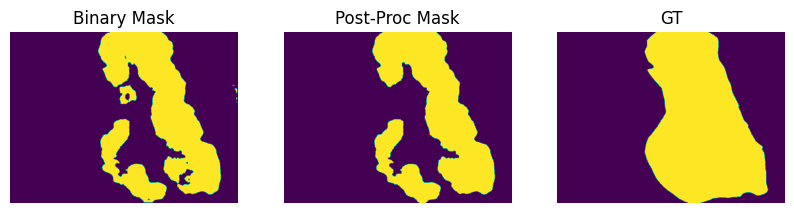

Dice score before postproc: 0.8141537308692932 vs after: 0.8100215196609497


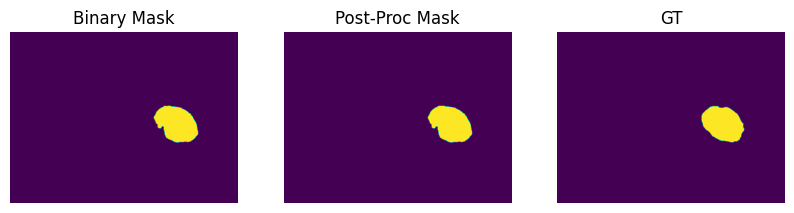

Dice score before postproc: 0.9569398164749146 vs after: 0.956899881362915


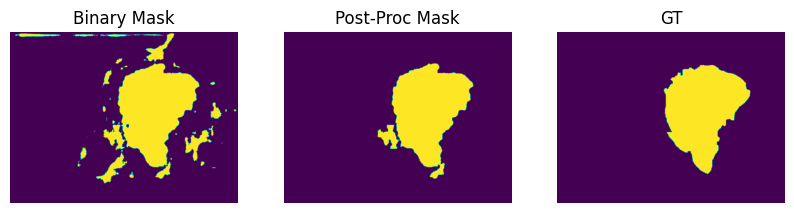

Dice score before postproc: 0.8132662773132324 vs after: 0.916471540927887


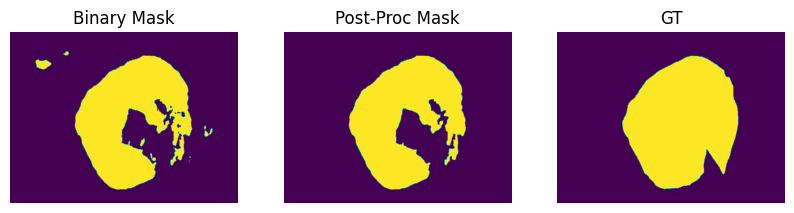

Dice score before postproc: 0.8783286213874817 vs after: 0.8844124674797058


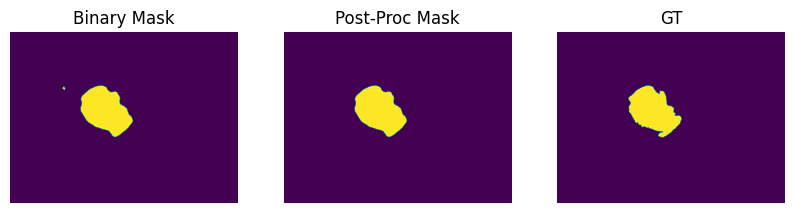

Dice score before postproc: 0.9647449851036072 vs after: 0.9662807583808899


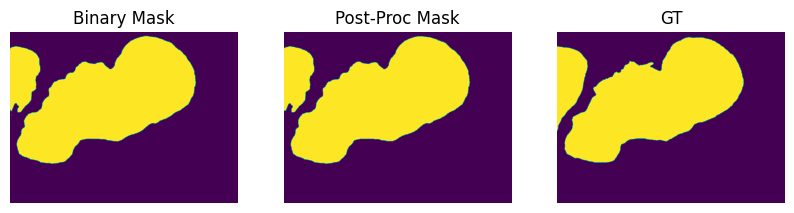

Dice score before postproc: 0.9820870757102966 vs after: 0.9821765422821045


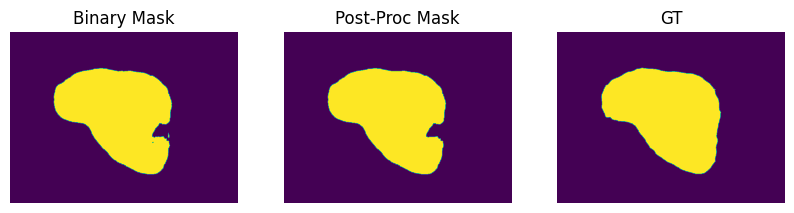

Dice score before postproc: 0.9707300066947937 vs after: 0.9704465866088867


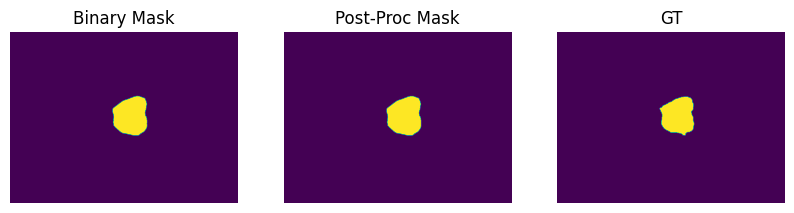

Dice score before postproc: 0.9602479934692383 vs after: 0.9605146050453186


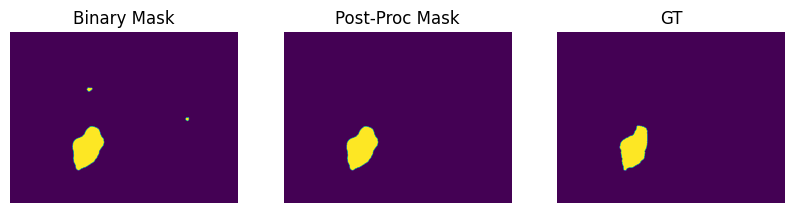

Dice score before postproc: 0.9216353297233582 vs after: 0.935370922088623


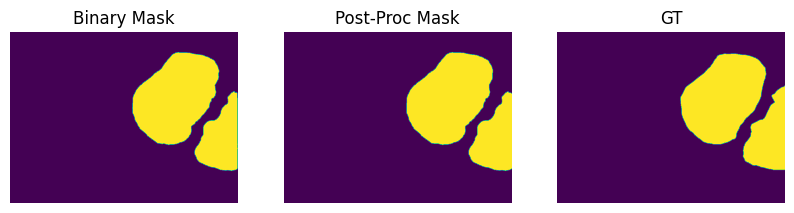

Dice score before postproc: 0.9775205850601196 vs after: 0.9791131615638733


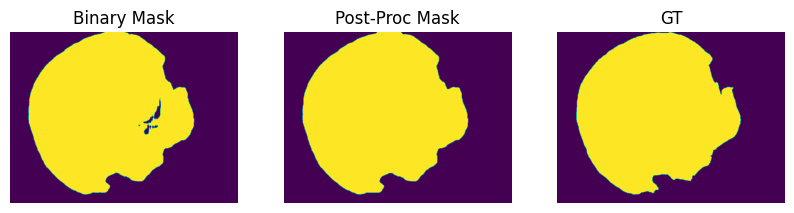

Dice score before postproc: 0.9868929982185364 vs after: 0.990491509437561


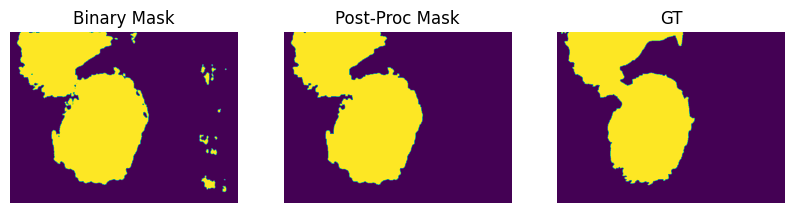

Dice score before postproc: 0.9223364591598511 vs after: 0.9326029419898987


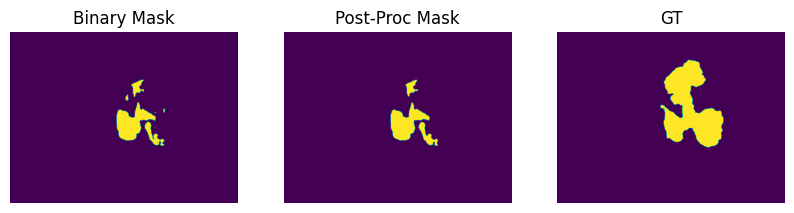

Dice score before postproc: 0.5058680772781372 vs after: 0.49913978576660156


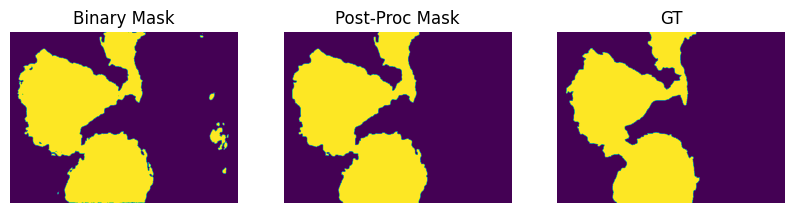

Dice score before postproc: 0.9359564185142517 vs after: 0.9460442066192627


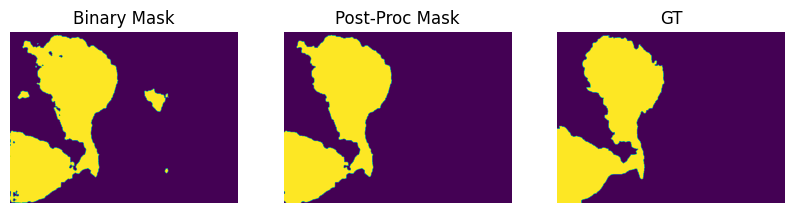

Dice score before postproc: 0.9323419332504272 vs after: 0.9521241188049316


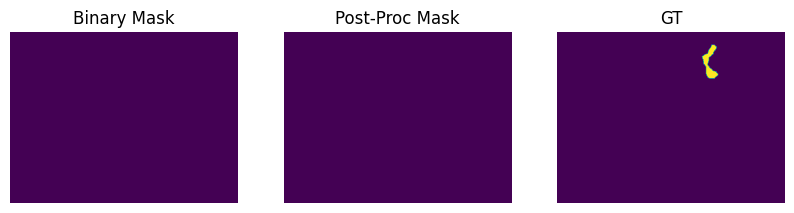

Dice score before postproc: 0.0 vs after: 0.0


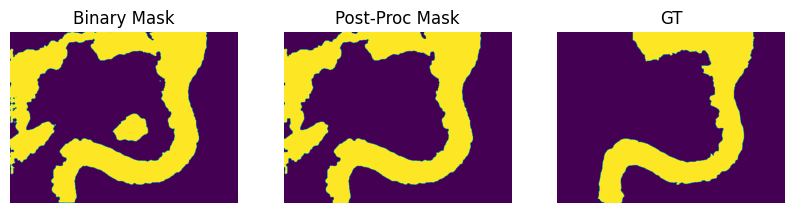

Dice score before postproc: 0.7692427635192871 vs after: 0.791785717010498


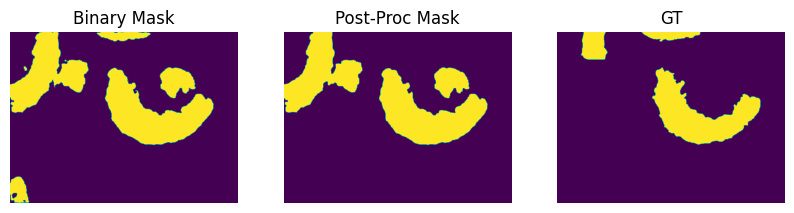

Dice score before postproc: 0.692907452583313 vs after: 0.6807437539100647


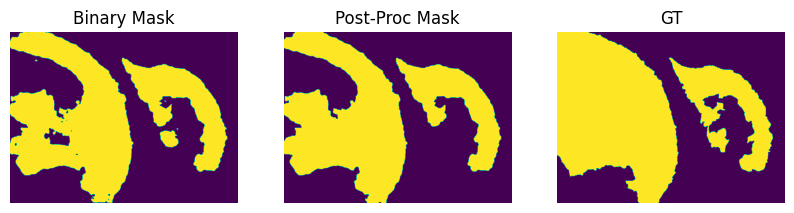

Dice score before postproc: 0.8774517178535461 vs after: 0.8792747855186462


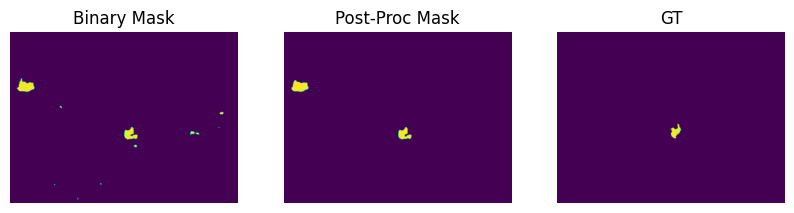

Dice score before postproc: 0.3360370695590973 vs after: 0.3778126537799835


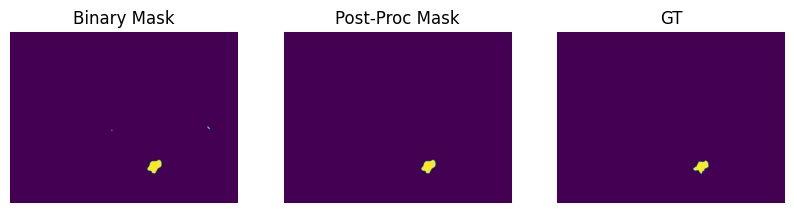

Dice score before postproc: 0.8866481184959412 vs after: 0.9013785719871521


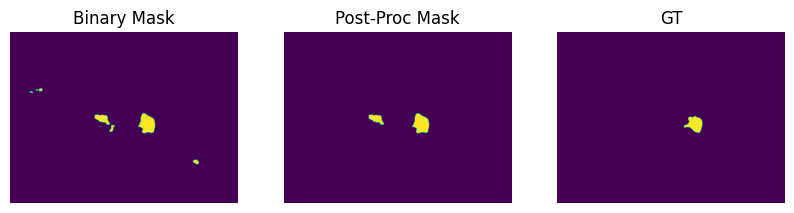

Dice score before postproc: 0.643402099609375 vs after: 0.711827278137207


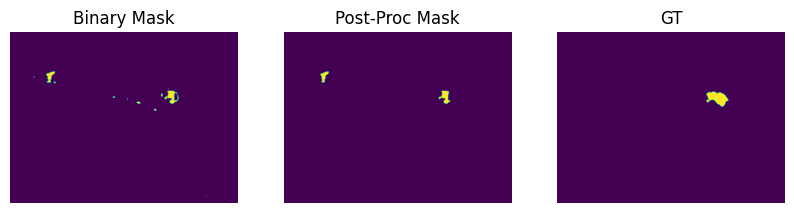

Dice score before postproc: 0.4304141104221344 vs after: 0.40747198462486267


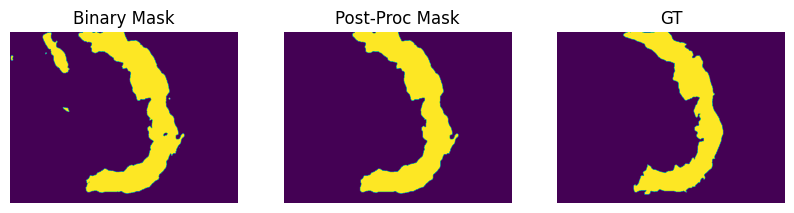

Dice score before postproc: 0.8864730596542358 vs after: 0.9235701560974121


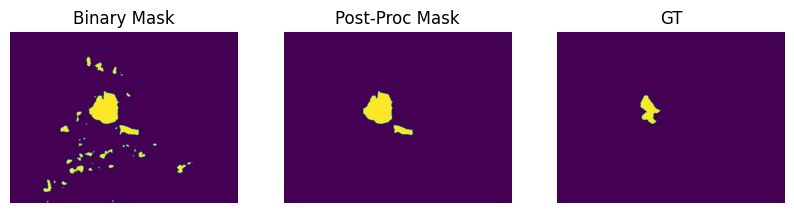

Dice score before postproc: 0.35203689336776733 vs after: 0.5230769515037537


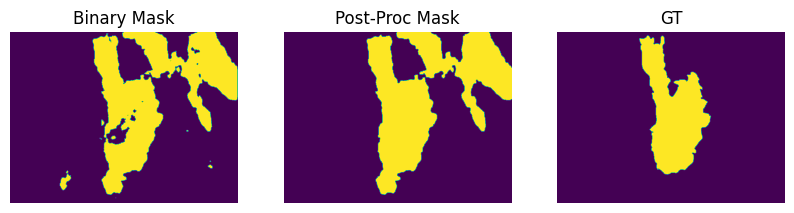

Dice score before postproc: 0.6310741901397705 vs after: 0.6623221635818481


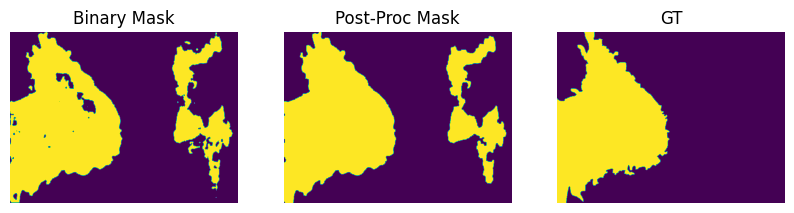

Dice score before postproc: 0.833850085735321 vs after: 0.8521100878715515


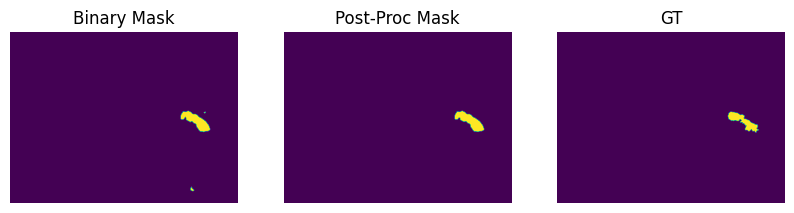

Dice score before postproc: 0.8303765654563904 vs after: 0.8495631217956543


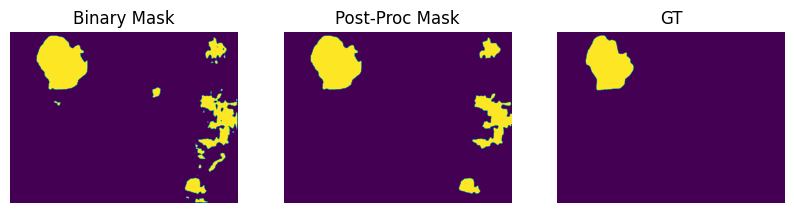

Dice score before postproc: 0.6343446969985962 vs after: 0.6670480966567993


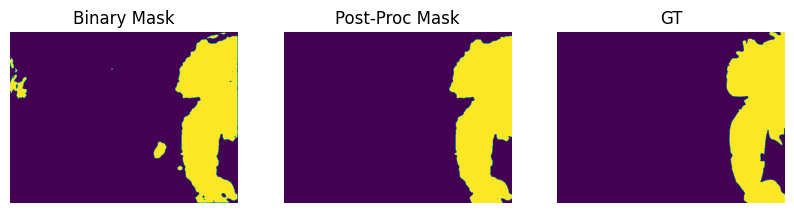

Dice score before postproc: 0.9354982376098633 vs after: 0.9671649932861328


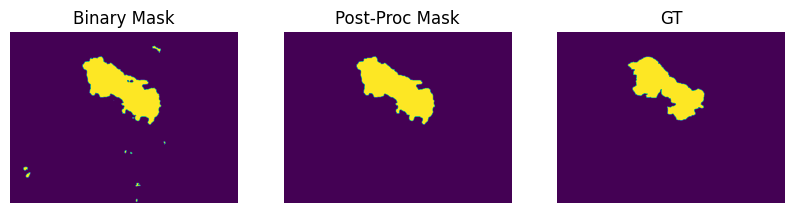

Dice score before postproc: 0.8640002608299255 vs after: 0.8756821155548096


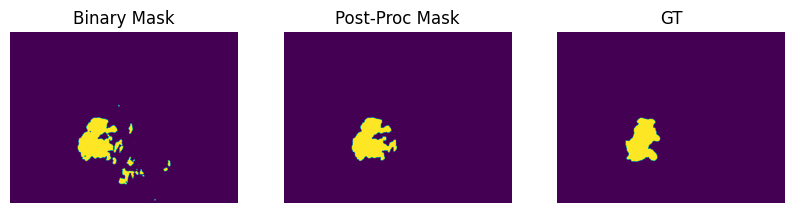

Dice score before postproc: 0.7329149842262268 vs after: 0.8139366507530212


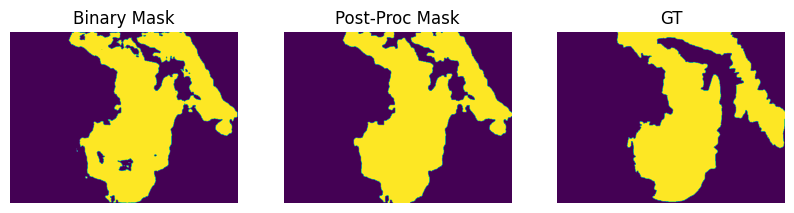

Dice score before postproc: 0.9131917357444763 vs after: 0.9203595519065857


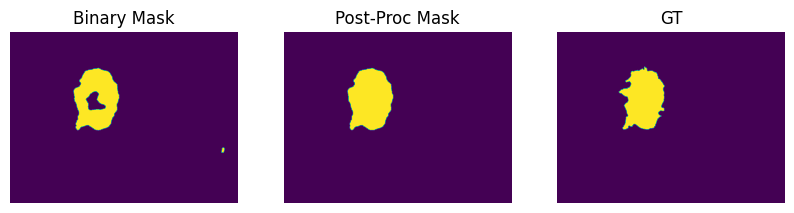

Dice score before postproc: 0.8858138918876648 vs after: 0.9446278810501099


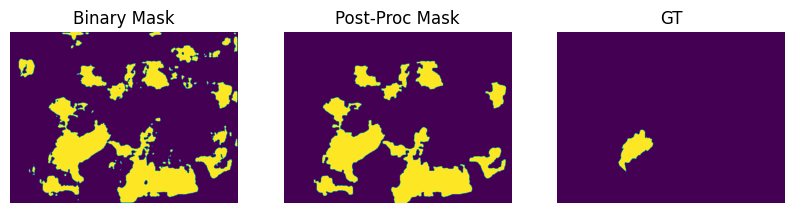

Dice score before postproc: 0.1391856074333191 vs after: 0.15998269617557526


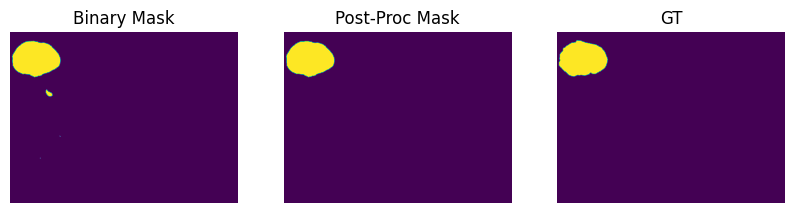

Dice score before postproc: 0.9590364098548889 vs after: 0.9686110019683838


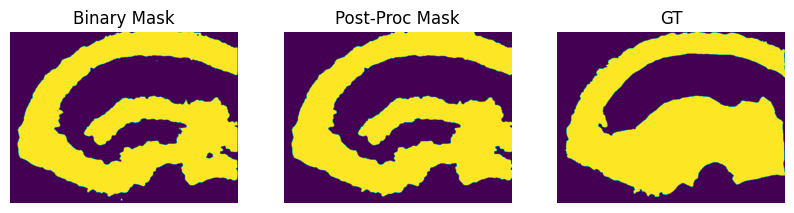

Dice score before postproc: 0.8987206220626831 vs after: 0.8990610837936401


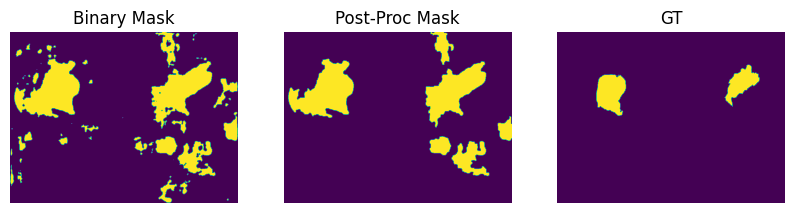

Dice score before postproc: 0.37051600217819214 vs after: 0.42664897441864014


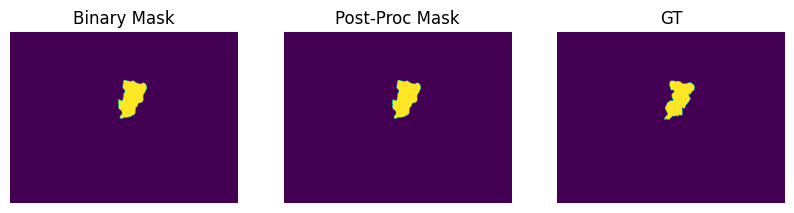

Dice score before postproc: 0.9225440621376038 vs after: 0.9233437180519104


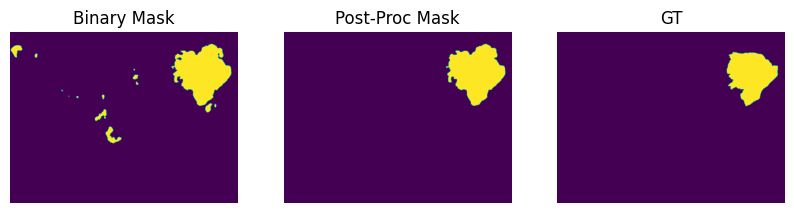

Dice score before postproc: 0.8166196942329407 vs after: 0.8833520412445068


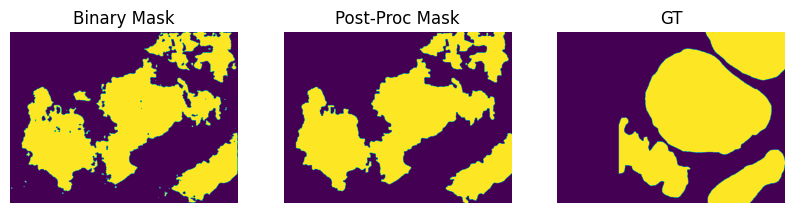

Dice score before postproc: 0.6714016199111938 vs after: 0.6748669147491455


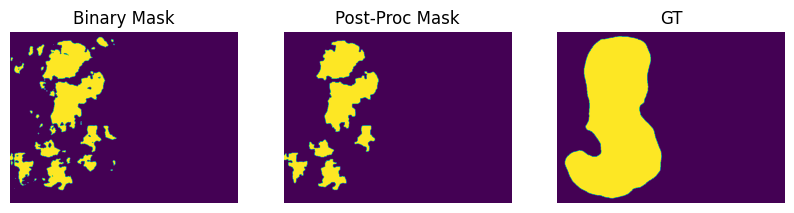

Dice score before postproc: 0.538229763507843 vs after: 0.5172706842422485


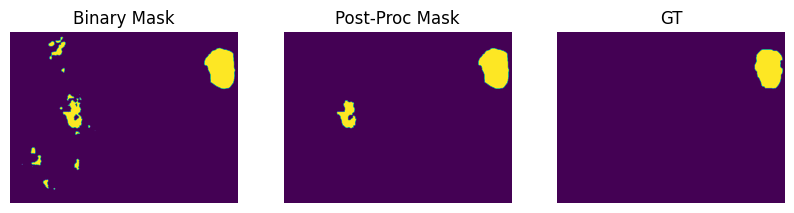

Dice score before postproc: 0.7067618370056152 vs after: 0.813707172870636


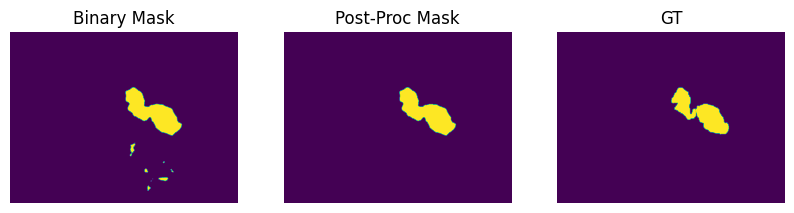

Dice score before postproc: 0.8894340395927429 vs after: 0.9212646484375


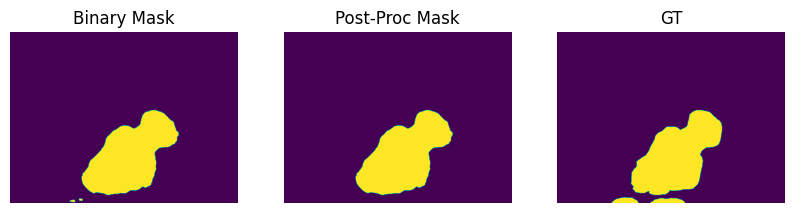

Dice score before postproc: 0.9501919746398926 vs after: 0.948413074016571


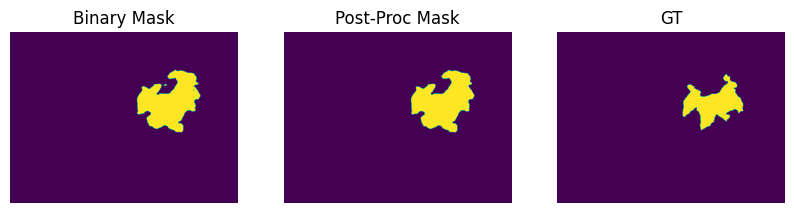

Dice score before postproc: 0.7798265218734741 vs after: 0.7801992893218994


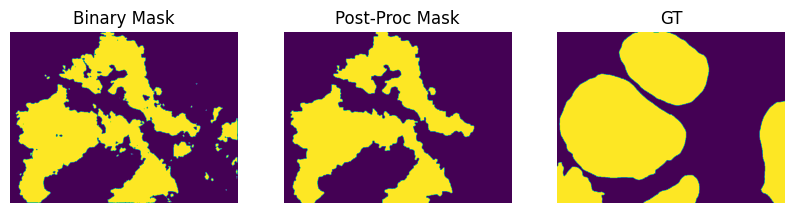

Dice score before postproc: 0.6518434882164001 vs after: 0.6504662036895752


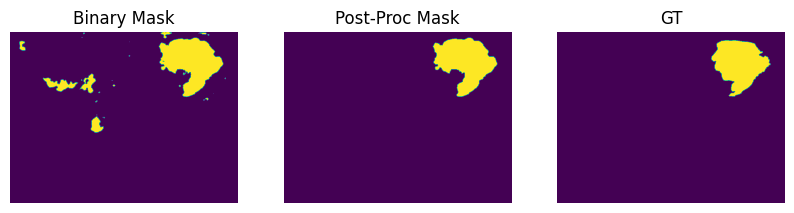

Dice score before postproc: 0.7816213965415955 vs after: 0.8897975087165833


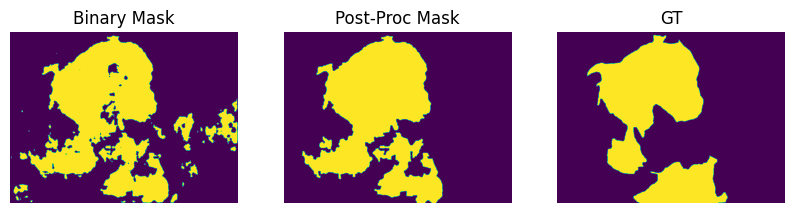

Dice score before postproc: 0.7920287847518921 vs after: 0.8397266268730164


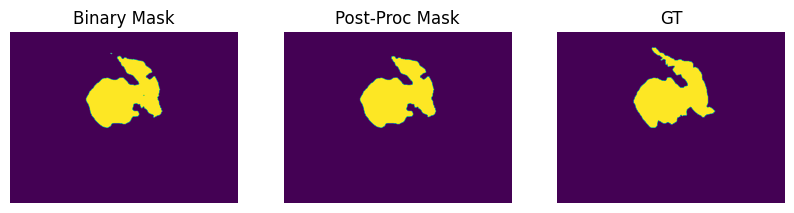

Dice score before postproc: 0.9371300935745239 vs after: 0.9367036819458008


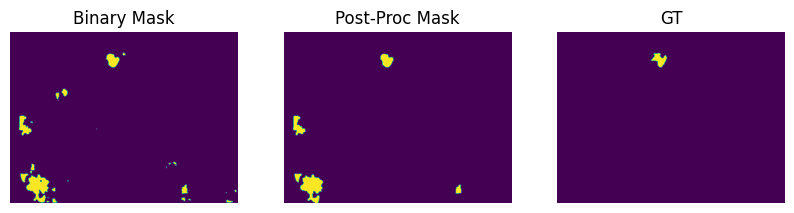

Dice score before postproc: 0.21429182589054108 vs after: 0.2510342001914978


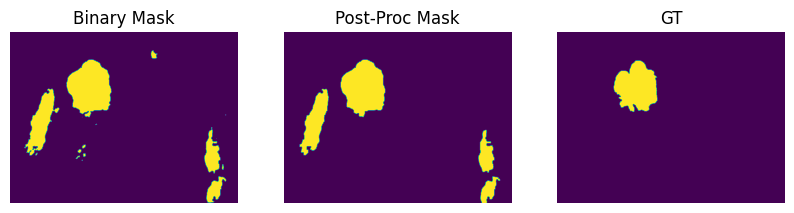

Dice score before postproc: 0.6194353103637695 vs after: 0.6318056583404541


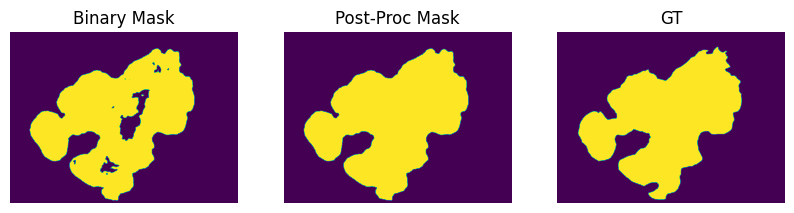

Dice score before postproc: 0.937634289264679 vs after: 0.9686067700386047


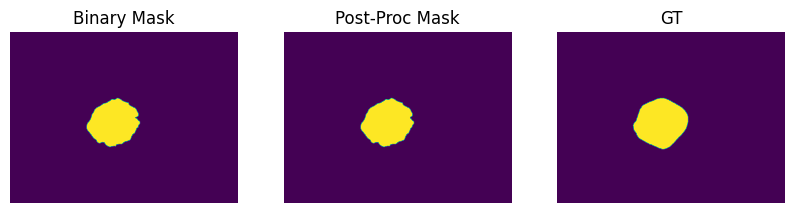

Dice score before postproc: 0.9457783699035645 vs after: 0.9458009600639343


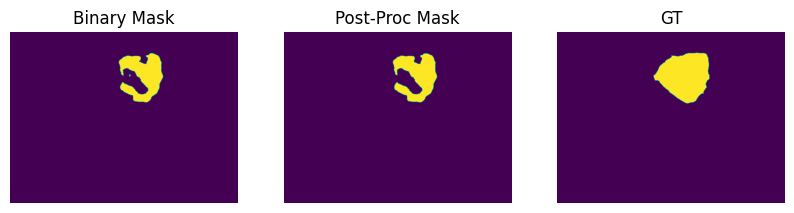

Dice score before postproc: 0.7663527727127075 vs after: 0.7649380564689636


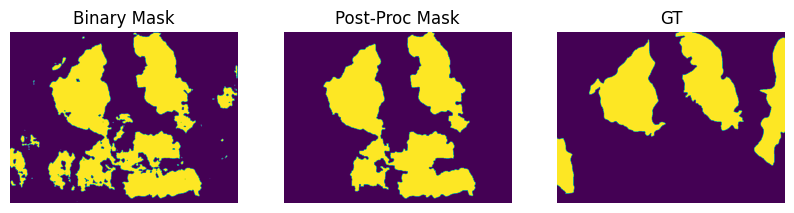

Dice score before postproc: 0.6150137186050415 vs after: 0.5991653800010681


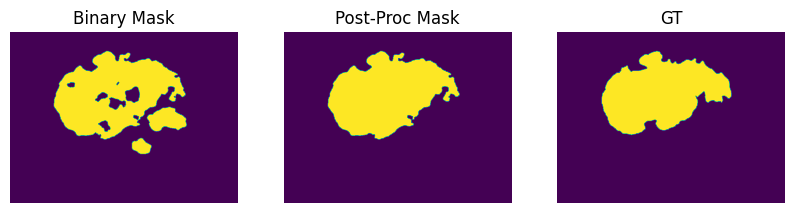

Dice score before postproc: 0.8562951683998108 vs after: 0.9380341172218323


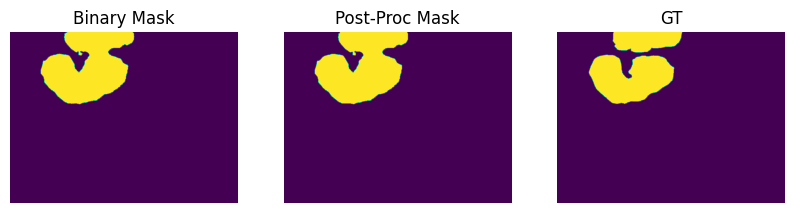

Dice score before postproc: 0.9526087045669556 vs after: 0.9528501629829407


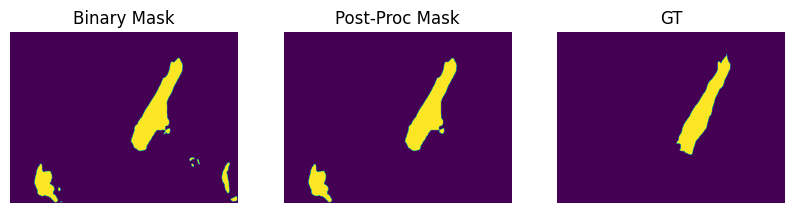

Dice score before postproc: 0.7585180997848511 vs after: 0.7979534864425659


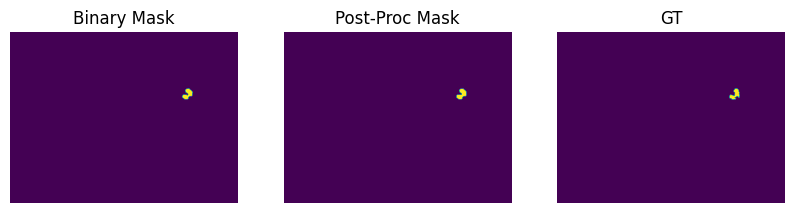

Dice score before postproc: 0.8560105562210083 vs after: 0.8586525917053223


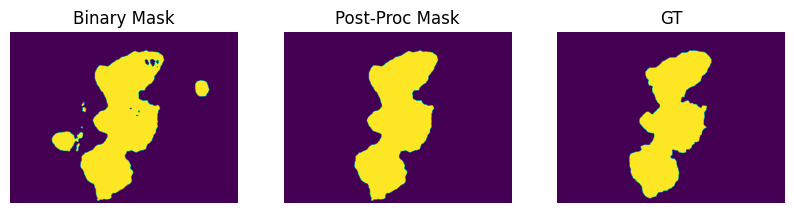

Dice score before postproc: 0.9124443531036377 vs after: 0.957880437374115


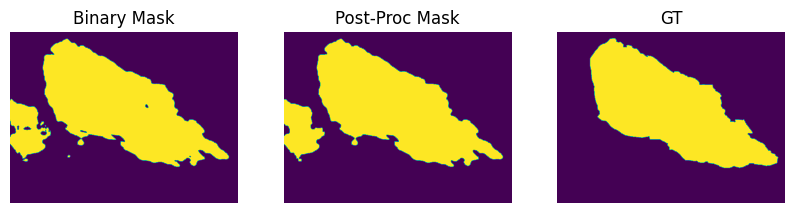

Dice score before postproc: 0.9103596806526184 vs after: 0.91023850440979


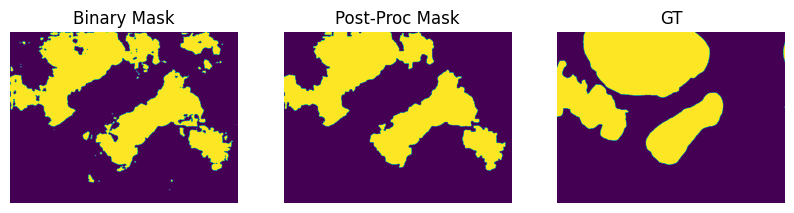

Dice score before postproc: 0.6979773640632629 vs after: 0.7257959246635437
Av. dice score before preproc:  0.7841260322723591 vs post:  0.8035066101229054


In [15]:
# Put validation data through, plotting image, prediction, ground truth each time
from tqdm import tqdm

threshold = 0.5
dice_coeff = 0.0
post_dice_coeff = 0.0
n = 0

# Perform loop without computing gradients
with torch.no_grad():
    for idx, (inputs, targets) in enumerate(val_loader):
        
        inputs = inputs.to(device)
        targets = targets.to(device)

        outputs = model(inputs)

        dice_coeff += batch_dice_coeff(outputs>threshold, targets).detach().cpu().numpy()
        n += 1

        im = inputs[0].detach().cpu().permute(1,2,0).numpy()
        pred = threshold_mask(outputs[0][0].detach().cpu().numpy())
        gt = targets[0][0].detach().cpu().numpy()

        #plot_image(im, pred, gt)
        dice = dice_coefficient(torch.from_numpy(pred).float(), torch.from_numpy(gt).float())

        # Post-process mask
        post_proc_mask = np.clip(post_process_binary_mask(pred), 0, 1)

        post_proc_dice = dice_coefficient(torch.from_numpy(post_proc_mask).float(), torch.from_numpy(gt).float())

        post_dice_coeff += post_proc_dice
        
        # Plot prediction before and after processing
        fig, ax = plt.subplots(1, 3, figsize=(10, 5))
        ax[0].imshow(pred)
        ax[0].set_title('Binary Mask')
        ax[0].axis('off')

        ax[1].imshow(post_proc_mask)
        ax[1].set_title('Post-Proc Mask')
        ax[1].axis('off')

        ax[2].imshow(gt)
        ax[2].set_title('GT')
        ax[2].axis('off')

        plt.show()

        print(f"Dice score before postproc: {dice} vs after: {post_proc_dice}")

pre_proc_dice_av = dice_coeff/n
post_proc_dice_av = post_dice_coeff/n
print("Av. dice score before preproc: ", pre_proc_dice_av, "vs post: ", post_proc_dice_av)

In [11]:
post = post_process_binary_mask(pred)

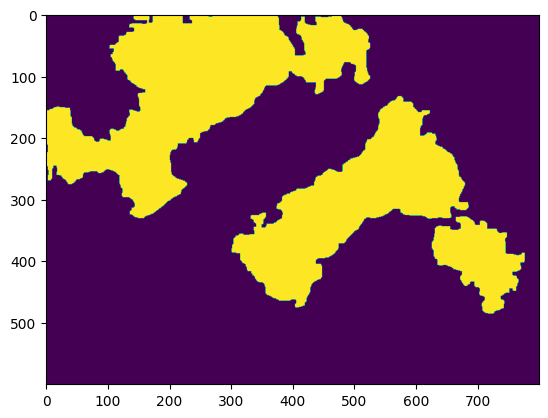

In [12]:
plt.imshow(post)